In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
def syntag1(y, t, tau_w, stim_func, protein_func):
    """synaptic tagging model 1. It uses 2 intermediate variables which then would be summed up

    Parameters
    ----------
    y
        tuples of voltage to be integrated
    t
        time vector
    tau_w
        time constant of voltage
    stim_func
        stimulus function of time
    protein_func
        presence of protein in function
    """
    w1, w2 = y

    stim = stim_func(t)

    fw1 =  (-w1 + stim_func(t))/tau_w
    fw2 = -w2*(w2-0.5)*(w2-1) + protein_func(stim)

    return [fw1, fw2]

# MODEL 1

In [16]:
DEL_STIM = 0.5

STIM_START = 0.2
STIM_STOP = STIM_START + DEL_STIM

In [17]:
def stim_func(t):
    if t > STIM_START and t <  STIM_STOP:
        return 1
    return 0

def dopa_func(stim):
    if stim > 0:
        return 1
    else:
        return 0

In [22]:
del_t = 0.01
max_t = 20
tau_w = 0.1

t = np.arange(0, max_t, step=del_t)
y0 = 0.1 * np.random.random(2)

sol = odeint(syntag1, y0, t, args=(tau_w, stim_func, dopa_func))

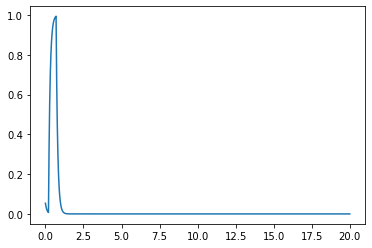

In [19]:
plt.plot(t, sol[:, 0])

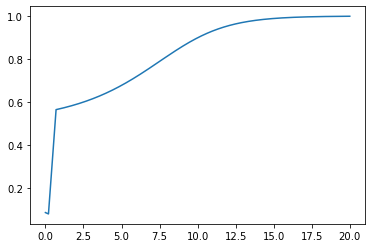

In [20]:
plt.plot(t, sol[:, 1])

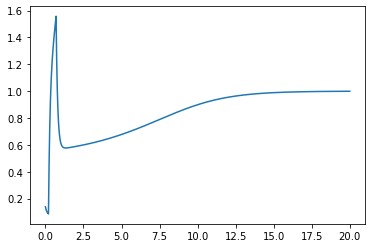

In [21]:
w = sol[:, 1] + sol[:, 0]

plt.plot(t, w)

# MODEL 2

In [67]:
def syntag2(y, t, tc_short, tc_long, stim_func, dopa_func):
    """synaptic tagging model2. time constant of voltage were modulated by dopamine function

    Parameters
    ----------
    y
        tuples of voltage and time constant to be integrated
    t
        time
    tc_short
        short time contant when dopamine does not modulating 
    tc_long
        long time constant when dopamine is modulating
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w, gamma = y
    
    stim = stim_func(t)

    f_w = (-w + stim) * gamma
    f_gamma = -gamma * (gamma - 1/tc_long) * (gamma - 1/tc_short) + dopa_func(stim)

    return [f_w, f_gamma]

In [90]:
DEL_STIM = 1

STIM_START = 0.1
STIM_STOP = STIM_START + DEL_STIM



In [91]:
def stim_func(t):
    if t > STIM_START and t <  STIM_STOP:
        return 1
    return 0

def dopa_func(stim):
    if stim > 0:
        return 1
    else:
        return 0

In [92]:
del_t = 0.01
max_t = 20

t = np.arange(0, max_t, step=del_t)
y0 = [0., 0]

sol2 = odeint(syntag2, y0, t, args=(100000, 1000, stim_func, dopa_func))

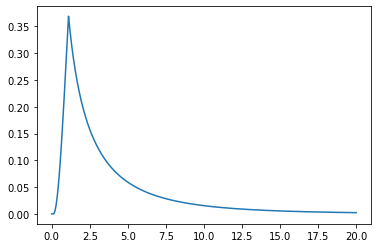

In [93]:
plt.plot(t, sol2[:, 0])

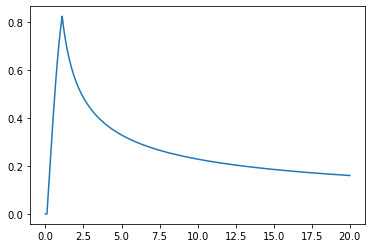

In [94]:
plt.plot(t, sol2[:, 1])